In [1]:
library(parallel)
library(lme4)
library(mgcv)
library(xtable)

Loading required package: Matrix
Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:lme4’:

    lmList

This is mgcv 1.8-15. For overview type 'help("mgcv-package")'.


Data requirements: patient tissues, patient mutations matrix, patient affinities matrix

In [2]:
get_or <- function(fit) { c(exp(c(coef(fit)[2,1],coef(fit)[2,1]-1.96*coef(fit)[2,2],coef(fit)[2,1]+1.96*coef(fit)[2,2])),coef(fit)[2,4]) }

In [3]:
#Format data
tissue <- read.csv('../../data/patient_tissues.csv',header=TRUE)
mut <- read.csv('../../data/patient_mutations.cancer.PHBR.csv',header=TRUE)
aff <- read.csv('../../data/patient_affinities.cancer.PHBR.csv',header=TRUE)
patient <- as.character(mut[,1])
mut <- as.matrix(mut[,-1])
aff <- as.matrix(aff[,-1])
rownames(mut) <- rownames(aff) <- patient

In [5]:
y= as.vector(mut); x= as.vector(aff)
gene= rep(colnames(mut),each=nrow(mut))
pat= rep(rownames(mut),ncol(mut))
nmut= colSums(mut)
genesel= (gene %in% names(nmut[nmut>=5]))

In [7]:
tissuetypes <- as.character(unique(tissue[,2]))
mysummary0 <- mysummary1 <- mysummary2 <- vector("list",length(tissuetypes))
names(mysummary0) <- names(mysummary1) <- names(mysummary2) <- tissuetypes
for (i in 1:length(tissuetypes)) {
    message("TISSUE",tissuetypes[i])
    #
    patsel= pat %in% as.character(tissue$Sample[tissue$Tissue==tissuetypes[i]])
    sel= genesel & patsel
    #
    lme0= glm(y[sel] ~ log(x[sel]), family='binomial')
    mysummary0[[i]] <- summary(lme0)
    #
    lme1= glmer(y[sel] ~ log(x[sel]) + (1|gene[sel]), family='binomial')
    mysummary1[[i]] <- summary(lme1)
    #
    lme2= glmer(y[sel] ~ log(x[sel]) + (1|pat[sel]), family='binomial')
    mysummary2[[i]] <- summary(lme2)
    message("Done \n")
}

TISSUEMESO
Done 

TISSUEBRCA
Done 

TISSUEUCS
Done 

TISSUELUSC
Done 

TISSUEGBM
Done 

TISSUEREAD
Done 

TISSUEKICH
Done 

TISSUECOAD
Done 

TISSUESKCM
Done 

TISSUESTAD
Done 

TISSUETHCA
Done 

TISSUEPRAD
Done 

TISSUECESC
Done 

TISSUEBLCA
Done 

TISSUEUVM
Done 

TISSUEACC
Done 

TISSUELGG
Done 

TISSUEUCEC
Done 

TISSUETGCT
Done 

TISSUEOV
Done 

TISSUELAML
Done 

TISSUELUAD
Done 

TISSUELIHC
Done 

TISSUEHNSC
Done 

TISSUEPCPG
Done 

TISSUEKIRP
Done 

TISSUESARC
Done 

TISSUEDLBC
Done 

TISSUEKIRC
Done 

TISSUEPAAD
Done 



In [8]:
tabgene <- do.call(rbind,lapply(mysummary1,get_or))
tabpat <- do.call(rbind,lapply(mysummary2,get_or))

xtable(tabgene[order(rownames(tabgene)),],digits=c(0,3,3,3,4))
xtable(tabpat[order(rownames(tabpat)),],digits=c(0,3,3,3,4))

,1,2,3,4
ACC,1.0701996,0.6799645,1.6843927,0.76938140
BLCA,1.1141088,0.9888056,1.2552905,0.07588671
BRCA,1.1319644,1.0142551,1.2633345,0.02692075
CESC,1.1499754,0.7833466,1.6881971,0.47559408
COAD,0.9921404,0.8978208,1.0963688,0.87696322
DLBC,2.8159424,0.7665446,10.3445148,0.11887372
GBM,1.0512104,0.9037558,1.2227234,0.51720214
HNSC,1.1066874,0.9844609,1.2440890,0.08956135
KICH,1.0112512,0.6203567,1.6484531,0.96420529
KIRC,0.7512520,0.5013955,1.1256176,0.16562296


,1,2,3,4
ACC,1.1717239,0.8050121,1.7054860,4.079671e-01
BLCA,1.2293029,1.1233202,1.3452848,7.187444e-06
BRCA,1.3278892,1.2335052,1.4294951,4.744932e-14
CESC,1.1476429,0.8746866,1.5057785,3.203272e-01
COAD,1.3621194,1.2708440,1.4599503,2.481288e-18
DLBC,1.7375759,0.9340959,3.2321839,8.103587e-02
GBM,1.1813179,1.0606933,1.3156601,2.427466e-03
HNSC,1.1991162,1.1013487,1.3055626,2.855364e-05
KICH,1.0112512,0.6203551,1.6484575,9.642055e-01
KIRC,0.7512520,0.5013953,1.1256182,1.656236e-01


## Panel C

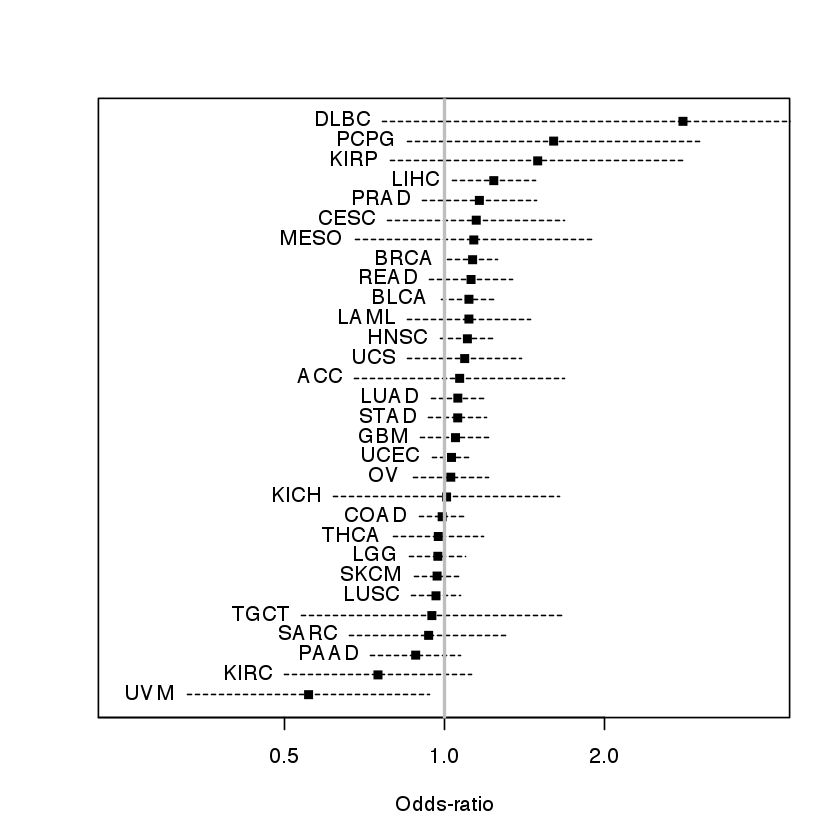

In [9]:
x2plot <- tabgene[order(tabgene[,1]),]
plot(x2plot[,1],1:nrow(x2plot),pch=15,xlim=c(0.25,4),yaxt='n',ylab='',xlab='Odds-ratio',log='x')
segments(x0=x2plot[,2],x1=x2plot[,3],1:nrow(x2plot),lty=2)
text(x2plot[,2],1:nrow(x2plot),rownames(x2plot),pos=2)
abline(v=1,col='gray',lwd=2)

## Panel D

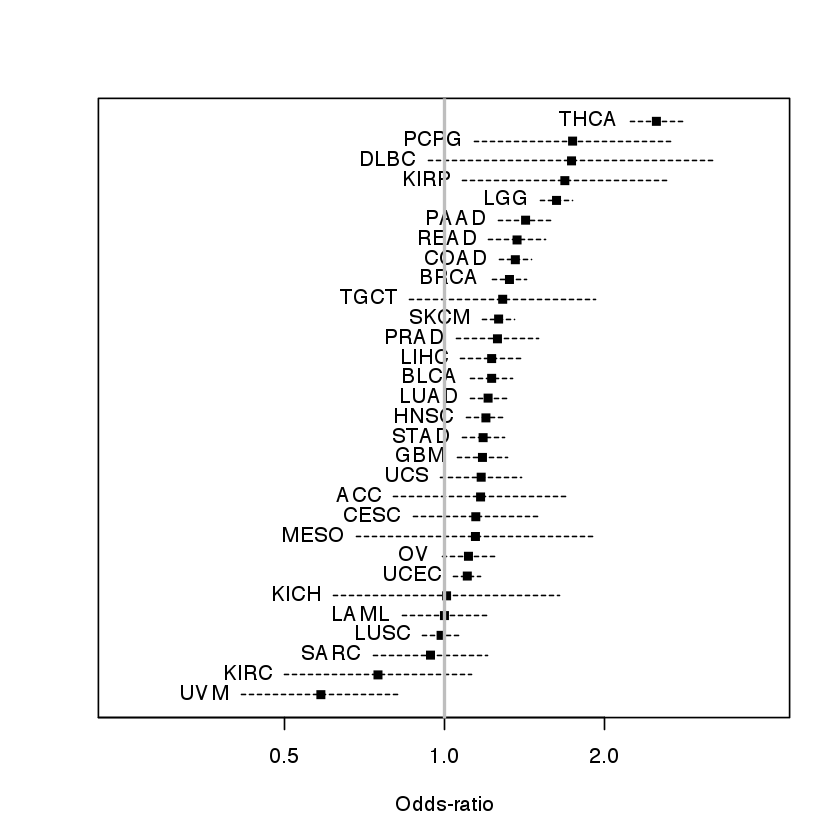

In [10]:
x2plot <- tabpat[order(tabpat[,1]),]
plot(x2plot[,1],1:nrow(x2plot),pch=15,xlim=c(0.25,4),yaxt='n',ylab='',xlab='Odds-ratio',log='x')
segments(x0=x2plot[,2],x1=x2plot[,3],1:nrow(x2plot),lty=2)
text(x2plot[,2],1:nrow(x2plot),rownames(x2plot),pos=2)
abline(v=1,col='gray',lwd=2)

## Panel E

In [11]:
y= as.vector(mut); x= as.vector(aff)
gene= rep(colnames(mut),each=nrow(mut))
pat= rep(rownames(mut),ncol(mut))
nmut= colSums(mut)
genesel= (gene %in% names(nmut[nmut>=20]))

In [12]:
tissuetypes <- as.character(unique(tissue[,2]))
mysummary0 <- mysummary1 <- mysummary2 <- vector("list",length(tissuetypes))
names(mysummary0) <- names(mysummary1) <- names(mysummary2) <- tissuetypes
for (i in 1:length(tissuetypes)) {
    message("TISSUE",tissuetypes[i])
    #
    patsel= pat %in% as.character(tissue$Sample[tissue$Tissue==tissuetypes[i]])
    sel= genesel & patsel
    #
    lme0= glm(y[sel] ~ log(x[sel]), family='binomial')
    mysummary0[[i]] <- summary(lme0)
    #
    lme1= glmer(y[sel] ~ log(x[sel]) + (1|gene[sel]), family='binomial')
    mysummary1[[i]] <- summary(lme1)
    #
    lme2= glmer(y[sel] ~ log(x[sel]) + (1|pat[sel]), family='binomial')
    mysummary2[[i]] <- summary(lme2)
    message("Done \n")
}

TISSUEMESO
Done 

TISSUEBRCA
Done 

TISSUEUCS
Done 

TISSUELUSC
Done 

TISSUEGBM
Done 

TISSUEREAD
Done 

TISSUEKICH
Done 

TISSUECOAD
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.123405 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?”Done 

TISSUESKCM
Done 

TISSUESTAD
Done 

TISSUETHCA
Done 

TISSUEPRAD
Done 

TISSUECESC
Done 

TISSUEBLCA
Done 

TISSUEUVM
Warning message:
“glm.fit: algorithm did not converge”

ERROR: Error: Response is constant


In [ ]:
tabgene <- do.call(rbind,lapply(mysummary1,get_or))
tabpat <- do.call(rbind,lapply(mysummary2,get_or))

xtable(tabgene[order(rownames(tabgene)),],digits=c(0,3,3,3,4))
xtable(tabpat[order(rownames(tabpat)),],digits=c(0,3,3,3,4))

In [ ]:
x2plot <- tabgene[order(tabgene[,1]),]
plot(x2plot[,1],1:nrow(x2plot),pch=15,xlim=c(0.25,4),yaxt='n',ylab='',xlab='Odds-ratio',log='x')
segments(x0=x2plot[,2],x1=x2plot[,3],1:nrow(x2plot),lty=2)
text(x2plot[,2],1:nrow(x2plot),rownames(x2plot),pos=2)
abline(v=1,col='gray',lwd=2)

## Panel F

In [ ]:
x2plot <- tabpat[order(tabpat[,1]),]
plot(x2plot[,1],1:nrow(x2plot),pch=15,xlim=c(0.25,4),yaxt='n',ylab='',xlab='Odds-ratio',log='x')
segments(x0=x2plot[,2],x1=x2plot[,3],1:nrow(x2plot),lty=2)
text(x2plot[,2],1:nrow(x2plot),rownames(x2plot),pos=2)
abline(v=1,col='gray',lwd=2)